In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Input

In [2]:
input_df = pd.read_csv("merchants_cleaned.csv")

input_df.shape

stripped_url = input_df['website'].apply(lambda x: str(x).replace(" ", ""))

stripped_url

stripped_name = input_df['merchant_name'].apply(lambda x: str(x).replace(" ", ""))

stripped_name

input_df['website'] = stripped_url
input_df['merchant_name'] = stripped_name

input_df.to_csv("merchants_cleaned_stripped.csv")

## Results All

In [3]:
all_df = pd.read_csv("results_all.csv")

In [4]:
all_df = all_df.iloc[:,1:]

In [5]:
all_df.shape

(230, 13)

In [6]:
all_df

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
0,CV.ASIATRIPINDONESIA,0.0,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{},http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,0.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0,{},https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,0.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{},https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},http://www.matair.co.id,APPROVED
4,SimplyMii,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,{},https://www.simplymii.com/,APPROVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Kotakulit,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,100.0,{},http://www.kotakulit.com,APPROVED
226,Kitchenited,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{'': 'None'},https://kitchenited.com,APPROVED
227,STEIITB,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{'': 'None'},http://ichveps.org/,APPROVED
228,TOKOPEDIA,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,100.0,{},https://www.tokopedia.com,APPROVED


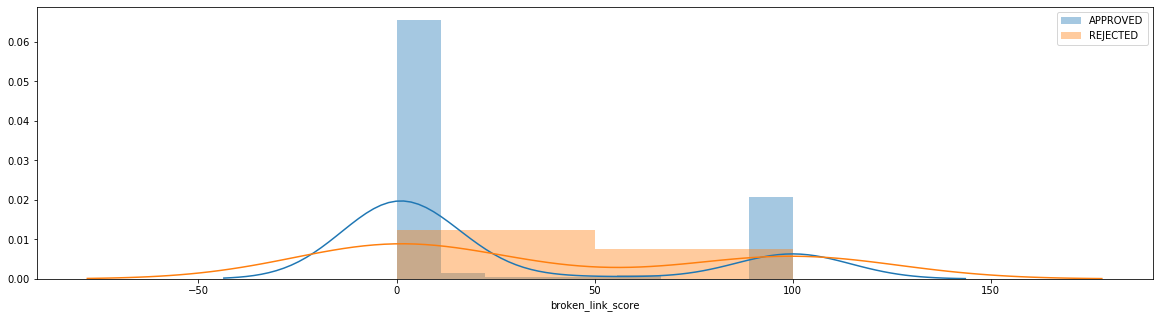

In [7]:
plt.figure(figsize=(20, 5))
sns.distplot(all_df[all_df.label == 'APPROVED']['broken_link_score'], label='APPROVED')
sns.distplot(all_df[all_df.label == 'REJECTED']['broken_link_score'], label='REJECTED')
plt.legend()
plt.show()

In [9]:
## Approved but scored 100 in broken links
anomaly_df = all_df[(all_df.label == 'APPROVED') & (all_df.broken_link_score == 100)]\
[['merchant_name','broken_link_score', 'label', 'website','broken_links']]

In [10]:
anomaly_df

,merchant_name,broken_link_score,label,website,broken_links
32,HuaningIndonesiaSukses,100.0,APPROVED,https://www.jomooz.com,{}
62,LUBRICANTS,100.0,APPROVED,http://payment.server-development.net,{'': 'None'}
70,BayyinahQuranIndonesia,100.0,APPROVED,bayyinah.id,{'': 'None'}
73,Aromanis,100.0,APPROVED,https://blanjamandiri.com,{'': 'None'}
74,CitraSuksesAbadi,100.0,APPROVED,https://blanjamandiri.com,{'': 'None'}
75,CV.Mantap,100.0,APPROVED,http://mantap.com,{'': 'None'}
76,ParsleyBakery,100.0,APPROVED,https://blanjamandiri.com,{'': 'None'}
77,TokoUDPulung,100.0,APPROVED,https://blanjamandiri.com,{'': 'None'}
78,CentralJayaTehnik,100.0,APPROVED,https://blanjamandiri.com,{'': 'None'}
83,BaboBaboTrading,100.0,APPROVED,https://www.worldshopdeluxe.com,{'': 'None'}


In [12]:
anomaly_df.shape

(45, 5)

In [14]:
## Remove anomaly
processed_df = all_df[~all_df['website'].isin(anomaly_df['website'])]

In [15]:
processed_df

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
0,CV.ASIATRIPINDONESIA,0.0,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{},http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,0.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0,{},https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,0.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{},https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},http://www.matair.co.id,APPROVED
4,SimplyMii,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,{},https://www.simplymii.com/,APPROVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,StylishArmor,0.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{},http://stylisharmor.com/,APPROVED
224,NomadWatchWorksID,0.0,1.0,1.0,1.0,1.0,0.0,0.0,100.0,0.0,{},https://www.nomadwatchworksid.com,APPROVED
225,Kotakulit,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,100.0,{},http://www.kotakulit.com,APPROVED
228,TOKOPEDIA,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,100.0,{},https://www.tokopedia.com,APPROVED


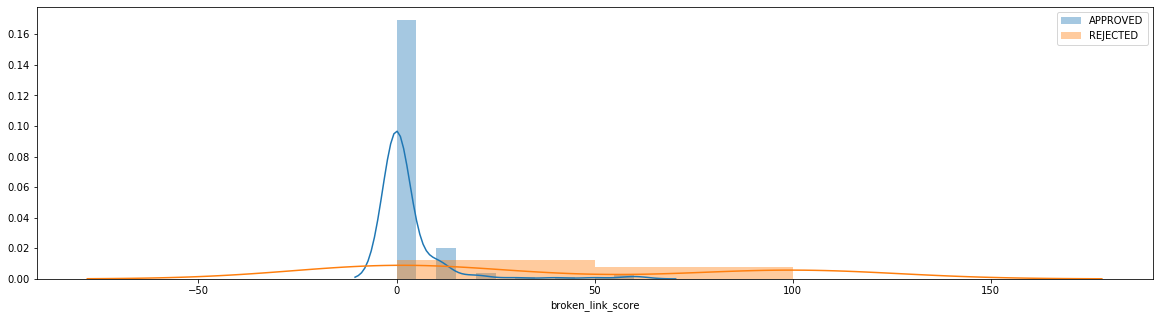

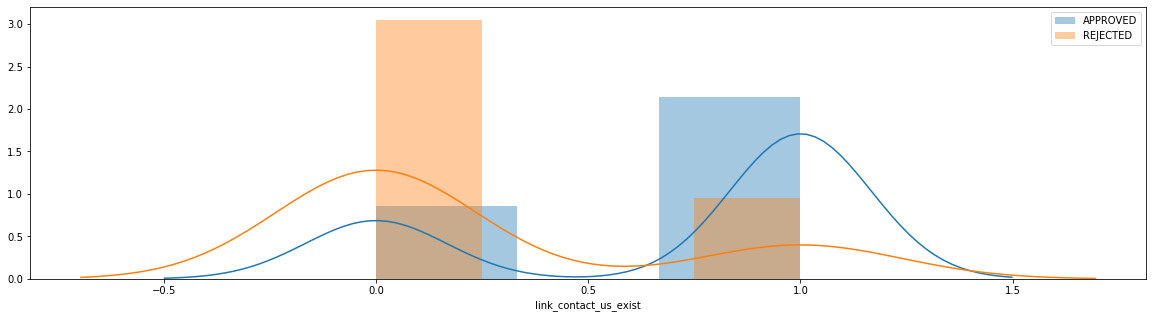

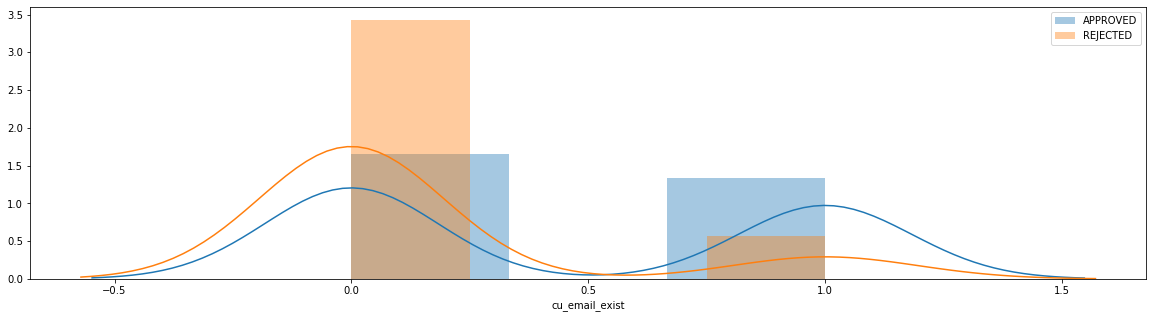

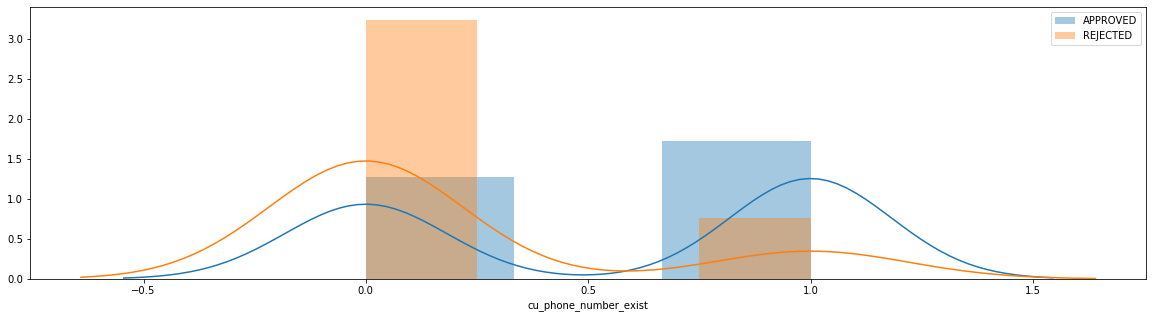

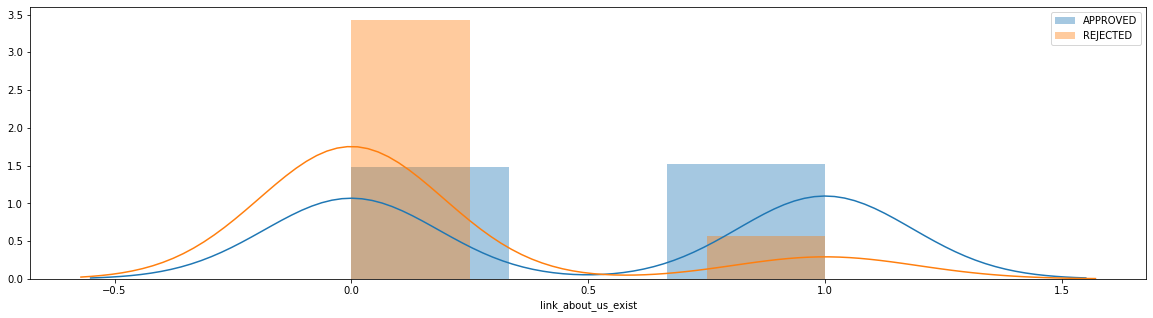

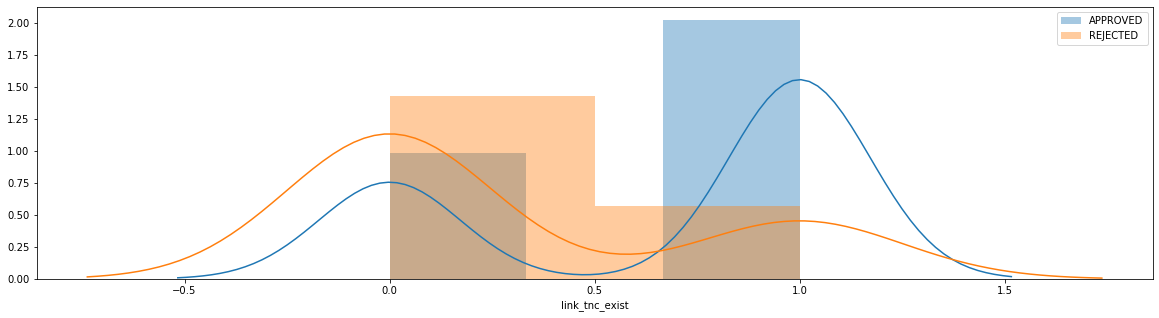

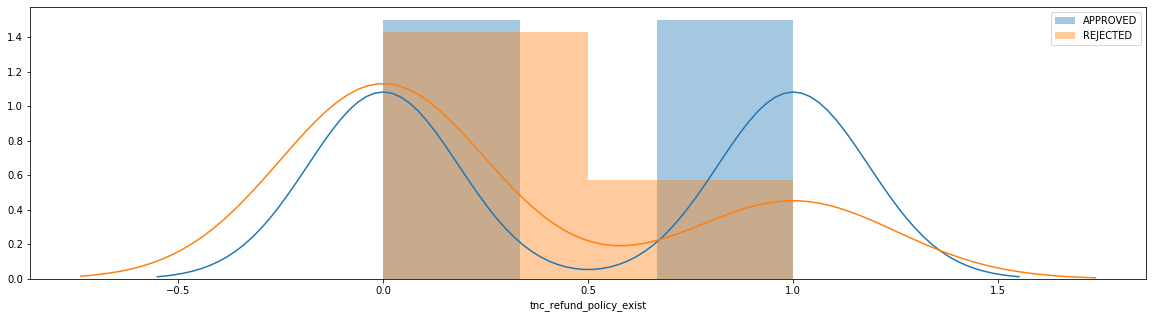

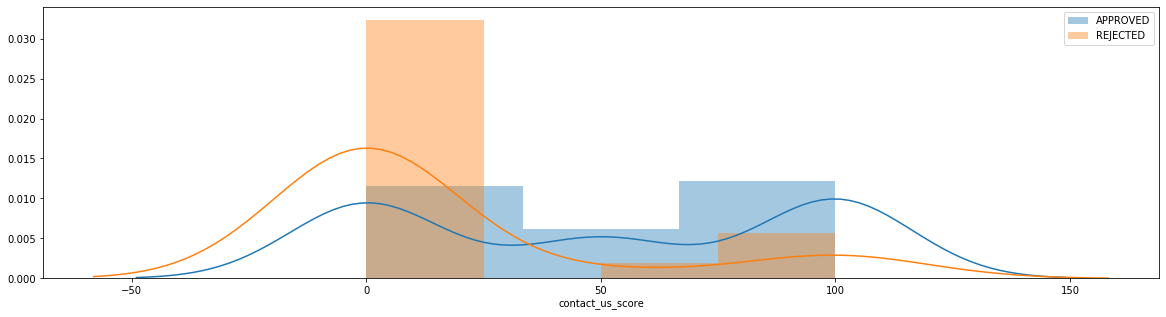

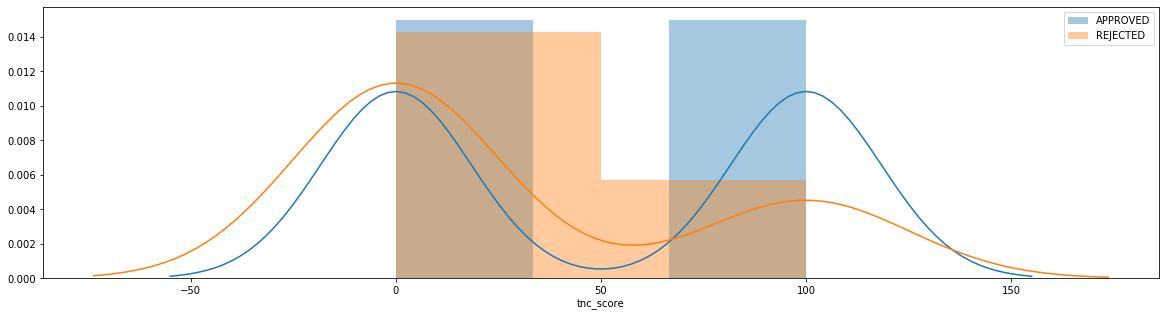

In [20]:
for column in processed_df.columns.values:
    if column == 'website' or column == 'broken_links' or column == 'merchant_name' or column == 'label':
        continue
    plt.figure(figsize=(20, 5))
    sns.distplot(processed_df[processed_df.label == 'APPROVED'][column], label='APPROVED')
    sns.distplot(processed_df[processed_df.label == 'REJECTED'][column], label='REJECTED')
    plt.legend()
    plt.show()